In [1]:
# General import
import numpy as np
import os
from PIL import Image
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt
%matplotlib inline
# Local import
from Codes.dataprocess import DataGen
from Codes.dataprocess import Export_ep
from Codes.alternate import AlternatingBD
from Codes.display import Display_ker
from Codes.display import Display_im
from Codes.simplex import Simplex
from Codes.fbstep import Energy

# Minimisation alternée

Approche variationnelle pour la reconstruction d'un noyau régulier $K$, minimisation de l'énergie,
$$
E_1(K) = \frac{1}{2} \| g - K * u\|^2 + \frac{1}{2} \alpha \| D K \|^2
\; .
$$ 
On peut considérer que le noyau appartien a l'ensemble des simplexe (ensemble des noyaux à coefficient positif dont la somme vaut 1).
On sonsidere alors l'énergie
$$
E_1'(K) = \frac{1}{2} \| g - K * u\|^2 + \frac{1}{2} \alpha \| D K \|^2 + \Sigma(K)
\; .
$$ 


Approche variationnelle pour la reconstruction de l'image $u$, avec régularisation TV,
$$
E_2(u) = \frac{1}{2} \| g - K * u\|^2 +  \mu \text{TV} (u)
\; .
$$

Dans la minimisation alternée, on considere d'abord la minimisation de $E_2$ 
pour reconstruire l'image $u$, puis de $E_1$ (ou éventuellement $E_1'$) pour reconstruire le noyau $K$.

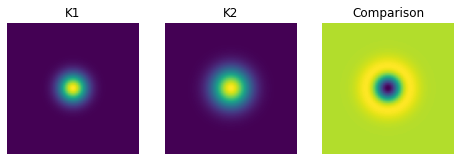

Erreur |K1 - K2|/ |K2| : 0.3500 


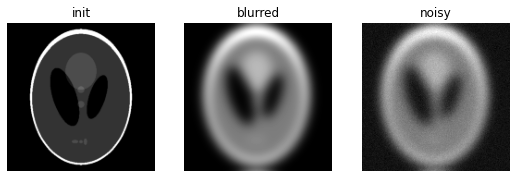

Erreur blurred |x_blurr- x_true|_2 :0.6436
Erreur |x_noisy - x_true|_2 :0.6449


In [2]:
K, K_shift, x_i, x_b, x_o1 = DataGen()

### Initialisation juste - bruit 1%

In [3]:
alpha = 1
mu    = 5
K_in   = K.copy()
x_in  = x_o1
# Kd,xd,Etot = AlternatingBD(K_in,x_in,x_o1,alpha,mu,alte=5,\
#                niter_TV=2000,niter_Lap =2000,proj_simplex=False)

In [4]:
# plt.plot(Etot,'+')
# plt.title("Initialisation juste, bruit 0.05")

In [5]:
# Display_ker(Kd,K,mysize=(8,4))
# Display_im(xd,x_i,mysize=(10,5))

### Initialisation noyau proche - pas de bruit

In [6]:
alpha = 1
mu    = 5
K_in      = K_shift.copy()
x_in      = x_b
# Kd,xd,Etot = AlternatingBD(K_in,x_in,x_b,alpha,mu,alte=5,\
#                niter_TV=5000,niter_Lap =5000,proj_simplex=False)

In [7]:
# plt.plot(Etot,'+')
# plt.title("Initialisation proche, pas de bruit")

In [8]:
# Display_ker(Kd,K,mysize=(8,4))
# Display_im(xd,x_i,mysize=(10,5))

In [9]:
#Export_ep(Etot,label='1',cas='2')

### Initialisation proche - bruit 1%

In [10]:
alpha = 1
mu    = 5
K_in      = K_shift.copy()
x_in      = x_o1
Kd,xd,Etot = AlternatingBD(K_in,x_in,x_o1,alpha,mu,alte=5,\
               niter_TV=5000,niter_Lap =5000,proj_simplex=False)

------------- min image -----------------
iteration 0 %--- gradient K 1677.7305 --- gradient x 2.5994
iteration 500 %--- gradient K 1882.1409 --- gradient x 0.9569
iteration 1000 %--- gradient K 1735.9785 --- gradient x 0.8490
iteration 1500 %--- gradient K 1647.8199 --- gradient x 0.7898
iteration 2000 %--- gradient K 1590.6612 --- gradient x 0.7531
iteration 2500 %--- gradient K 1549.1822 --- gradient x 0.7278
iteration 3000 %--- gradient K 1521.7790 --- gradient x 0.7112
iteration 3500 %--- gradient K 1499.2053 --- gradient x 0.6983
iteration 4000 %--- gradient K 1480.0186 --- gradient x 0.6877
iteration 4500 %--- gradient K 1464.9526 --- gradient x 0.6796
iteration 5000 %--- gradient K 1450.4976 --- gradient x 0.6727
iteration 5500 %--- gradient K 1438.0863 --- gradient x 0.6664
iteration 6000 %--- gradient K 1428.4107 --- gradient x 0.6615
iteration 6500 %--- gradient K 1419.5602 --- gradient x 0.6571
iteration 7000 %--- gradient K 1412.0381 --- gradient x 0.6536
iteration 7500 %-

iteration 62000 %--- gradient K 461.3162 --- gradient x 0.2029
iteration 62500 %--- gradient K 466.2883 --- gradient x 0.2049
iteration 63000 %--- gradient K 470.2224 --- gradient x 0.2064
iteration 63500 %--- gradient K 473.3974 --- gradient x 0.2077
iteration 64000 %--- gradient K 476.1402 --- gradient x 0.2087
iteration 64500 %--- gradient K 478.2195 --- gradient x 0.2095
iteration 65000 %--- gradient K 480.0213 --- gradient x 0.2102
iteration 65500 %--- gradient K 481.5441 --- gradient x 0.2108
iteration 66000 %--- gradient K 483.0326 --- gradient x 0.2113
iteration 66500 %--- gradient K 484.3607 --- gradient x 0.2118
iteration 67000 %--- gradient K 485.4964 --- gradient x 0.2122
iteration 67500 %--- gradient K 486.5063 --- gradient x 0.2126
iteration 68000 %--- gradient K 487.4525 --- gradient x 0.2130
iteration 68500 %--- gradient K 488.3753 --- gradient x 0.2133
iteration 69000 %--- gradient K 489.2336 --- gradient x 0.2136
iteration 69500 %--- gradient K 490.0157 --- gradient x

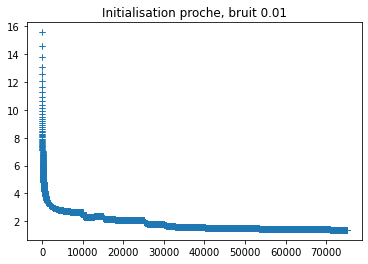

In [11]:
plt.plot(Etot,'+')
plt.title("Initialisation proche, bruit 0.01")
Export_ep(Etot,label='1',cas='2')

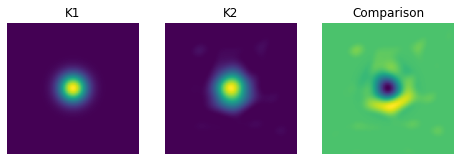

Erreur |K1 - K2|/ |K2| : 0.2249 


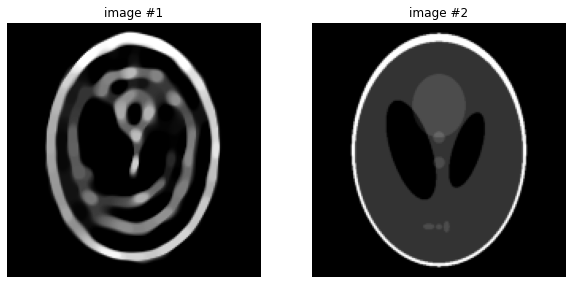

Erreur |im1 - im2|/|im2| :0.8391


In [12]:
Display_ker(Kd,K,mysize=(8,4))
Display_im(xd,x_i,mysize=(10,5))

In [14]:
Export_ep(Etot,label='1',cas='3')

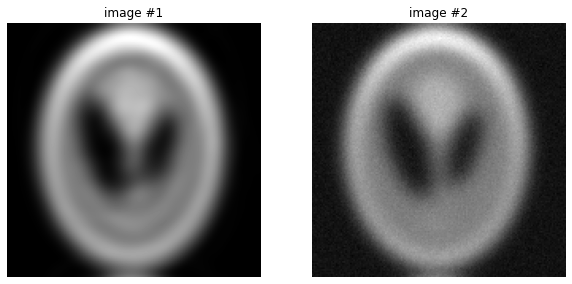

Erreur |im1 - im2|/|im2| :0.0557


In [18]:
from Codes.myfunc import convolve
# # local parameters and matrix sizes
M,_    = K.shape
M      = M//2 # kernel middle size
Nx, Ny = x_b.shape # image size
# kernel position (for padding)
min_x  = Nx//2+1-M-2
max_x  = Nx//2+M-1
min_y  = Ny//2+1-M-2
max_y  = Ny//2+M-1
# Initialisation
Kk                          = np.zeros((Nx,Ny))
Kk[min_x:max_x,min_y:max_y] = Kd
Display_im(convolve(xd,Kk),x_o1,mysize=(10,5))

In [13]:
import sys
sys.exit()

SystemExit: 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# ANNEXES

### Initialisation proche - bruit 1% - projection sur le simplex

In [ ]:
alpha = 0.1
mu    = 0.05
sigma,moy = 0.15, 0.05
K_in      = np.exp(-( (d-moy)**2 / ( 2.0 * sigma**2 ) ) )
K_in      = K_in/K_in.sum() # Simplex
x_in      = x_b
Kd,xd,Etot = AlternatingBD(K_in,x_in,x_o1,alpha,mu,alte=5,\
               niter_TV=200,niter_Lap =200,proj_simplex=True)

In [ ]:
plt.plot(Etot,'+')
plt.title("Initialisation proche, bruit 0.01, proj sur simplex")

In [ ]:
Display_ker(Kd,K,mysize=(8,4))
Display_im(xd,x_i,mysize=(10,5))

### Initialisation lointaine, bruit 1%, proj sur simplex

In [ ]:
alpha = 0.1
mu    = 0.05
sigma,moy = 0.4, 0.1
K_in      = np.exp(-( (d-moy)**2 / ( 2.0 * sigma**2 ) ) )
K_in      = K_in/K_in.sum() # Simplex
x_in      = x_b
Kd,xd,Etot = AlternatingBD(K_in,x_in,x_o1,alpha,mu,alte=5,\
               niter_TV=200,niter_Lap =200,proj_simplex=True)

In [ ]:
plt.plot(Etot,'+')
plt.title("Initialisation proche, bruit 0.01, proj sur simplex")

In [ ]:
Display_ker(Kd,K,mysize=(8,4))
Display_im(xd,x_i,mysize=(10,5))